# K nearest neighbors


# Without Libraries


In [8]:
import math
import csv
import random 

In [9]:
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1) - 1):
        distance += (float(point1[i]) - float(point2[i])) ** 2
    return distance

def manhattan_distance(point1, point2):
    distance = 0
    for i in range(len(point1) - 1):
        distance += abs(float(point1[i]) - float(point2[i]))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k
        self.training_data = []

    def fit(self, data):
        self.training_data = data
    
    def predict_euclidean(self, test_point):
        
        distances = []
        for data_point in self.training_data:
            dist = euclidean_distance(test_point, data_point)
            distances.append((data_point, dist))
        
        distances.sort(key=lambda x: x[1])  
        
        neighbors = [distances[i][0][-1] for i in range(self.k)] 
        
        class_label = max(set(neighbors), key=neighbors.count)
        return class_label
    
    def predict_manhattan(self, test_point):
        
        distances = []
        for data_point in self.training_data:
            dist = manhattan_distance(test_point, data_point)
            distances.append((data_point, dist))
        
        distances.sort(key=lambda x: x[1])  
        
        neighbors = [distances[i][0][-1] for i in range(self.k)] 
        
        class_label = max(set(neighbors), key=neighbors.count)
        return class_label
    
    

def load_iris_dataset(filename):
    dataset = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            dataset.append([float(x) if i < 4 else x for i, x in enumerate(row)])  
    return dataset


def train_test_split(dataset, test_size=0.3):
    random.shuffle(dataset)
    test_size = int(len(dataset) * test_size)
    test_set = dataset[:test_size]
    train_set = dataset[test_size:]
    return train_set, test_set

In [10]:
iris_dataset = load_iris_dataset('iris.csv')

train_data, test_data = train_test_split(iris_dataset)

knn = KNN(k=20)  
knn.fit(train_data)

correct_predictions = 0

print("Predicting the category of the datapoints by using Euclidean Distance: ")
print()
for test_point in test_data:
    features = test_point[:-1]
    true_label = test_point[-1]  # The class label
    predicted_label = knn.predict_euclidean(features)
    
    if predicted_label == true_label:
        correct_predictions += 1
    
    print(f"Test Point: {features},         True Label: {true_label},       Predicted Label: {predicted_label}")


accuracy = (correct_predictions / len(test_data)) * 100
print(f"\nAccuracy: {accuracy:.2f}%")
print()

correct_predictions = 0
print("Predicting the category of the datapoints by using Manhattan Distance: ")
print()
for test_point in test_data:
    features = test_point[:-1]
    true_label = test_point[-1]  # The class label
    predicted_label = knn.predict_manhattan(features)
    
    if predicted_label == true_label:
        correct_predictions += 1
    
    print(f"Test Point: {features},         True Label: {true_label},          Predicted Label: {predicted_label}")


accuracy = (correct_predictions / len(test_data)) * 100
print(f"\nAccuracy: {accuracy:.2f}%")
print()

Predicting the category of the datapoints by using Euclidean Distance: 

Test Point: [64.0, 6.1, 2.9, 4.7, '1.4'],         True Label: Iris-versicolor,       Predicted Label: Iris-versicolor
Test Point: [28.0, 5.2, 3.5, 1.5, '0.2'],         True Label: Iris-setosa,       Predicted Label: Iris-setosa
Test Point: [31.0, 4.8, 3.1, 1.6, '0.2'],         True Label: Iris-setosa,       Predicted Label: Iris-setosa
Test Point: [14.0, 4.3, 3.0, 1.1, '0.1'],         True Label: Iris-setosa,       Predicted Label: Iris-setosa
Test Point: [22.0, 5.1, 3.7, 1.5, '0.4'],         True Label: Iris-setosa,       Predicted Label: Iris-setosa
Test Point: [92.0, 6.1, 3.0, 4.6, '1.4'],         True Label: Iris-versicolor,       Predicted Label: Iris-versicolor
Test Point: [122.0, 5.6, 2.8, 4.9, '2.0'],         True Label: Iris-virginica,       Predicted Label: Iris-virginica
Test Point: [33.0, 5.2, 4.1, 1.5, '0.1'],         True Label: Iris-setosa,       Predicted Label: Iris-setosa
Test Point: [120.0, 6.0,

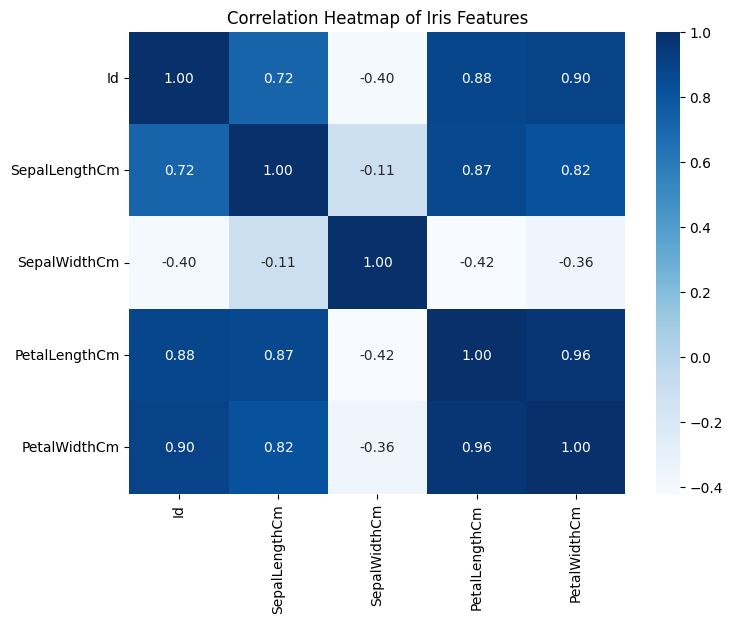

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('Iris.csv')

plt.figure(figsize=(8, 6))
correlation = data.drop('Species', axis=1).corr()  # Remove the target column 'species'
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

# With Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print("First five rows of the dataset:")
print(df.head())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train k-NN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print correct and incorrect predictions
print("\nCorrect Predictions:")
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        print(f"Actual: {iris.target_names[y_test[i]]}, Predicted: {iris.target_names[y_pred[i]]}")

print("\nIncorrect Predictions:")
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print(f"Actual: {iris.target_names[y_test[i]]}, Predicted: {iris.target_names[y_pred[i]]}")


First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Correct Predictions:
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of k-NN model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Accuracy of k-NN model: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



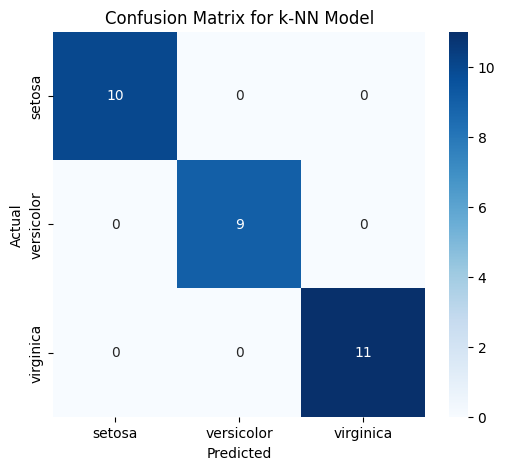

In [14]:
plt.figure(figsize=(6,5))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for k-NN Model")
plt.show()